In [38]:
# %load models.py
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense, Input, Add, merge, concatenate
from keras.layers.convolutional import Conv3D
from keras.layers.pooling import MaxPooling3D, GlobalAveragePooling3D, AveragePooling3D
from keras.initializers import he_uniform
from keras.initializers import glorot_uniform

def Squeeze_model(input_tensor):
    #input_tensor = Input(shape=(24, 24, 24, 16))
    
    x = Conv3D(filters=96,
               kernel_size=(3, 3, 3),
               strides = (2, 2, 2),
               padding='same',
               activation='relu',
               kernel_initializer=glorot_uniform(seed=1),
               bias_initializer='zeros', name="conv1")(input_tensor)
    
    
    x = Conv3D(filters=16, kernel_size=(1, 1, 1), kernel_initializer=glorot_uniform(seed=1), activation='relu', name="fire2_squeeze")(x)
    
    expand1 = Conv3D(64, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire2_expand1")(x)
    expand2 = Conv3D(64, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire2_expand2")(x)
    
    merge1 = concatenate([expand1, expand2], axis=4, name="merge_1")
    
    x = Conv3D(16, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire3_squeeze")(merge1)
    
    expand1 = Conv3D(64, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire3_expand1")(x)
    expand2 = Conv3D(64, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire3_expand2")(x)
    
    merge2 = concatenate([expand1, expand2], axis=4, name="merge_2")
    
    x = Conv3D(32, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire4_squeeze")(merge2)
    
    expand1 = Conv3D(128, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire4_expand1")(x)
    expand2 = Conv3D(128, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire4_expand2")(x)
    
    merge3 = concatenate([expand1, expand2], axis=4, name="merge_3")
    
    maxpool4 = MaxPooling3D(pool_size=(3, 3, 3), strides=(2, 2, 2), name="maxpool_4")(merge3)
    
    x = Conv3D(filters=32, kernel_size=(1, 1, 1), activation='relu', name="fire5_squeeze")(maxpool4)
    
    expand1 = Conv3D(128, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire5_expand1")(x)
    expand2 = Conv3D(128, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire5_expand2")(x)
    
    merge4 = concatenate([expand1, expand2], axis=4, name="merge_4")
    
    x = Conv3D(48, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire6_squeeze")(merge4)
    
    expand1 = Conv3D(192, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire6_expand1")(x)
    expand2 = Conv3D(192, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire6_expand2")(x)
    
    merge5 = concatenate([expand1, expand2], axis=4, name="merge_5")
    
    x = Conv3D(48, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire7_squeeze")(merge5)
    
    expand1 = Conv3D(192, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire7_expand1")(x)
    expand2 = Conv3D(192, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire7_expand2")(x)
    
    merge6 = concatenate([expand1, expand2], axis=4, name="merge_6")
    
    x = Conv3D(64, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire8_squeeze")(merge6)
    
    expand1 = Conv3D(256, (1, 1, 1), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire8_expand1")(x)
    expand2 = Conv3D(256, (3, 3, 3), kernel_initializer=glorot_uniform(seed=1), padding='same', activation='relu', name="fire8_expand2")(x)
    
    merge7 = concatenate([expand1, expand2], axis=4, name="merge_7")
    
    avgpool = AveragePooling3D(pool_size=(3, 3, 3), padding='same', name="avg8")(merge7)
    
    flatten = Flatten(name="flatten")(avgpool)
    
    output = Dense(1, activation='linear', kernel_initializer=glorot_uniform(seed=1))(flatten)
    
    #model = Model(input_tensor, output)
    
    return output

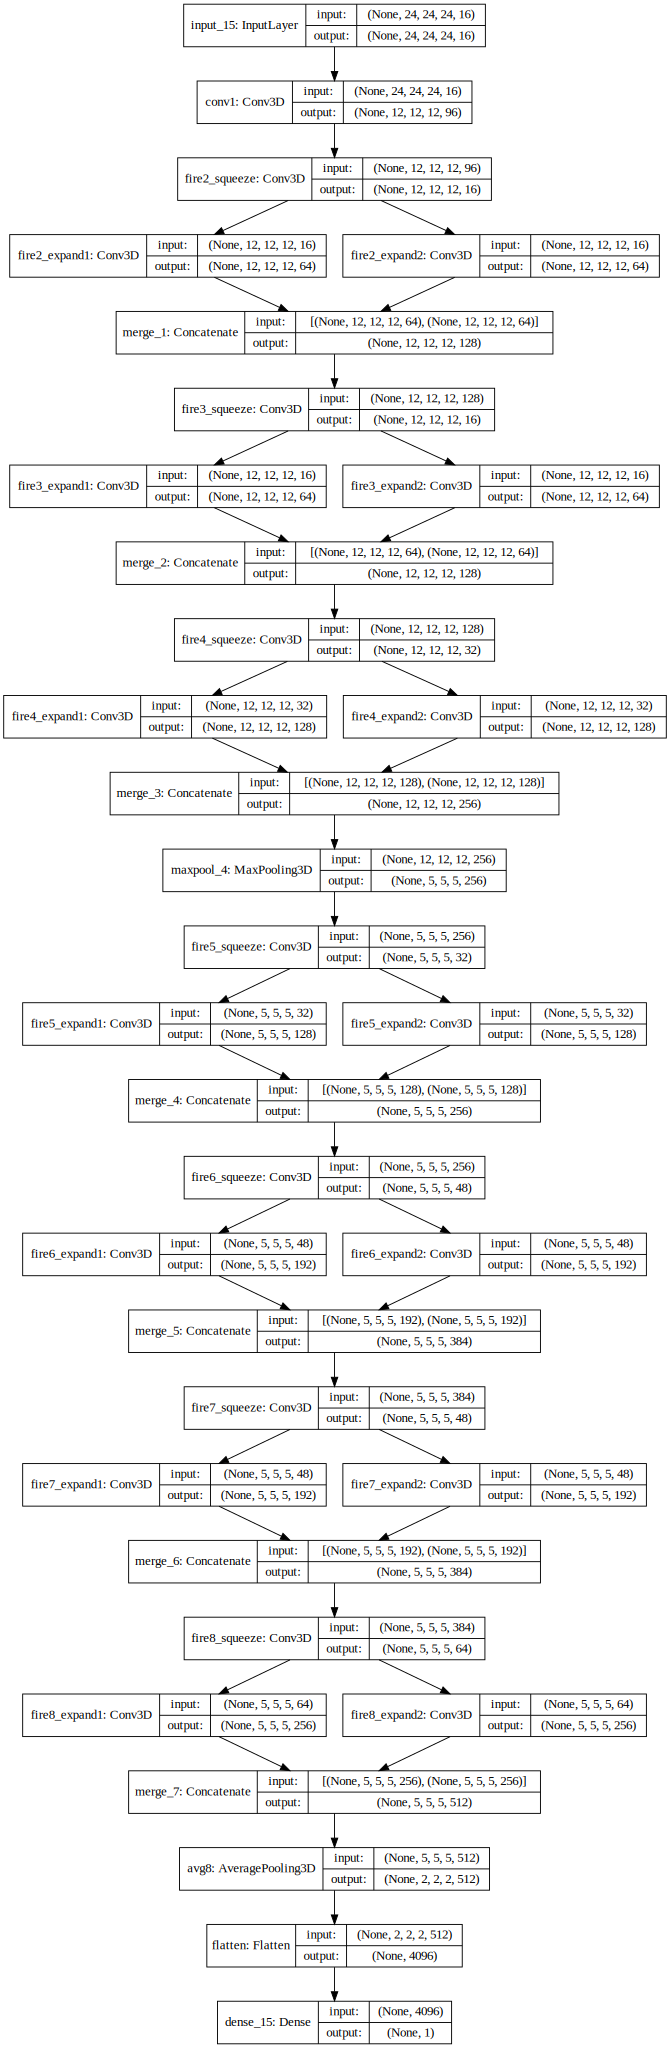

In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model, model_to_dot
model_input = Input(shape=(24, 24, 24, 16))
squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
#plot_model(squeeze_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(squeeze_model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
# plot_model(get_model4((24, 24, 24, 16)))

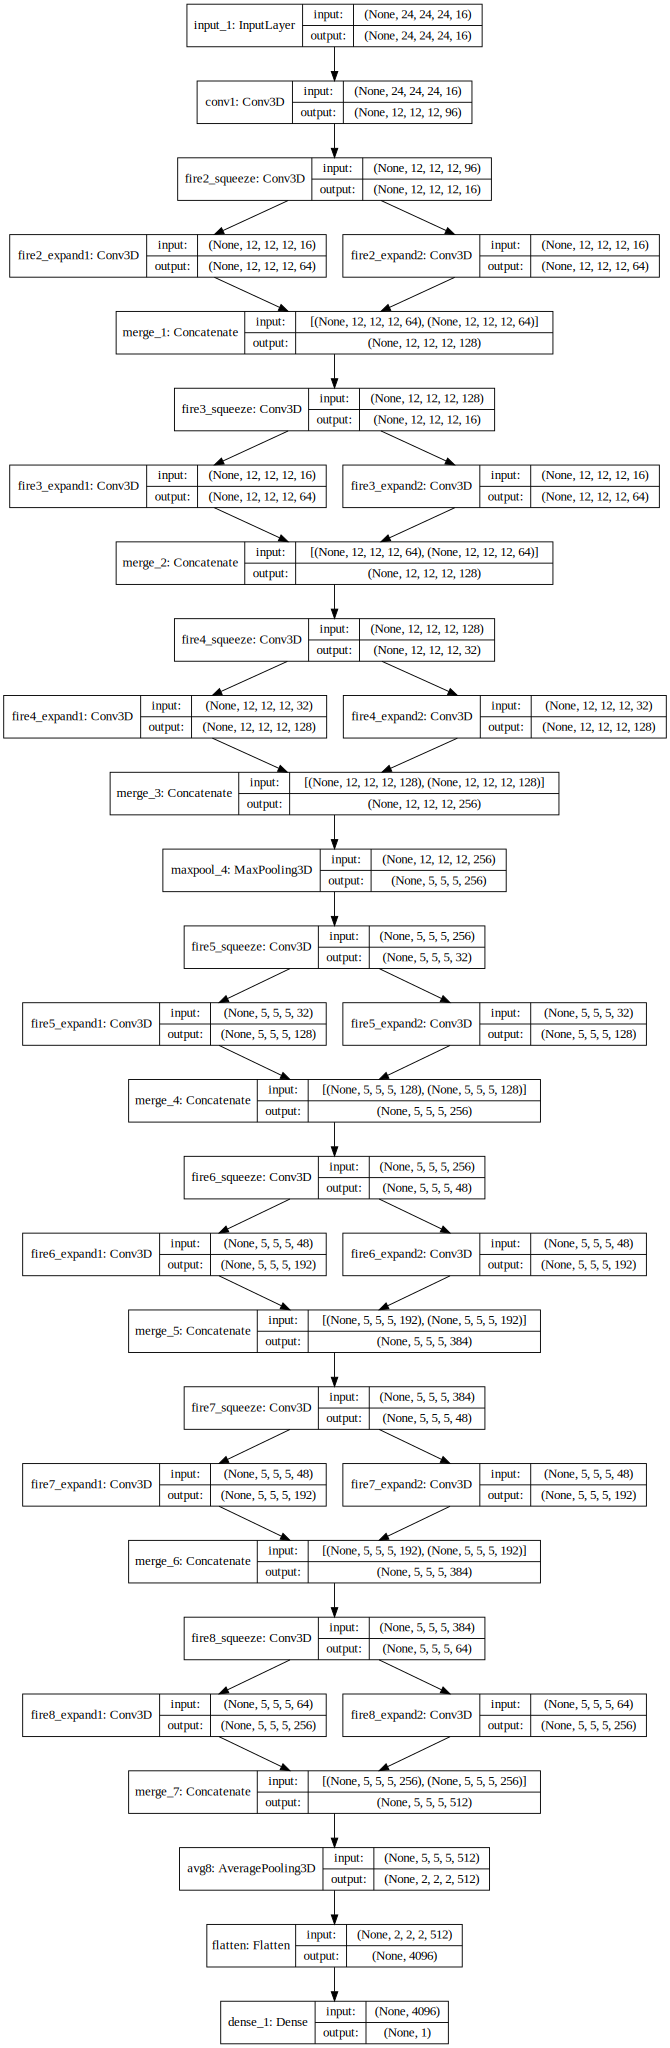

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model, model_to_dot
model_input = Input(shape=(24, 24, 24, 16))
squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
#plot_model(squeeze_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(squeeze_model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
# plot_model(get_model4((24, 24, 24, 16)))

In [40]:
squeeze_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 24, 24, 24, 1 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 12, 12, 12, 9 41568       input_15[0][0]                   
__________________________________________________________________________________________________
fire2_squeeze (Conv3D)          (None, 12, 12, 12, 1 1552        conv1[0][0]                      
__________________________________________________________________________________________________
fire2_expand1 (Conv3D)          (None, 12, 12, 12, 6 1088        fire2_squeeze[0][0]              
__________________________________________________________________________________________________
fire2_expa

In [30]:
squeeze_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 24, 24, 24, 1 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 12, 12, 12, 9 41568       input_13[0][0]                   
__________________________________________________________________________________________________
maxpool_1 (MaxPooling3D)        (None, 5, 5, 5, 96)  0           conv1[0][0]                      
__________________________________________________________________________________________________
fire2_squeeze (Conv3D)          (None, 5, 5, 5, 16)  1552        maxpool_1[0][0]                  
__________________________________________________________________________________________________
fire2_expa